<a href="https://colab.research.google.com/github/Sounak-singh/KNN-1/blob/main/KNN-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##adding basic libraries and importing dataset


In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
data = files.upload()

Saving salary.csv to salary.csv


##Load dataset

In [3]:
data = pd.read_csv('salary.csv')


Summarize dataset


In [4]:
print(data.shape)
print(data.head)

(32561, 5)
<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week income
0       90              9             0              40  <=50K
1       82              9             0              18  <=50K
2       66             10             0              40  <=50K
3       54              4             0              40  <=50K
4       41             10             0              40  <=50K
...    ...            ...           ...             ...    ...
32556   22             10             0              40  <=50K
32557   27             12             0              38  <=50K
32558   40              9             0              40   >50K
32559   58              9             0              40  <=50K
32560   22              9             0              20  <=50K

[32561 rows x 5 columns]>


##mapping salary to 1 and 0

In [ ]:

data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(data.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


##segregqte in x and y

In [5]:
x=data.iloc[:,:-1].values
x


array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [6]:
y=data.iloc[:,-1].values
y

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

##train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=0)

##feaure scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

##finding best k value

Text(0, 0.5, 'Mean Error')

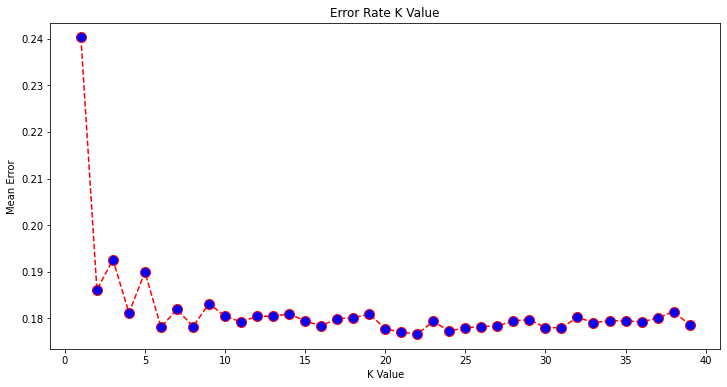

In [14]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##training

In [17]:
model=KNeighborsClassifier(n_neighbors=16,metric='minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=16)

In [24]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not get Salary above 50K")

Enter New Employee's Age: 90
Enter New Employee's Education: 9
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 40
['<=50K']
Customer might not get Salary above 50K


##prediction of all test data

In [26]:
Y_pred= model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ...
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']]


##evaluation using confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_pred)

print("COnfusion matrix")
print(cm)
print("accuracy of the moodel: {0}%".format(accuracy_score(Y_test,Y_pred)*100))

COnfusion matrix
[[6193    0]
 [1948    0]]
accuracy of the moodel: 76.07173565900996%
